# Reference 
+ https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

+ KMeans
+ SVM
+ 5 full connected layer

In [10]:

# Load Data #
import pandas as pd
import numpy as np

data_folder = '../data/'

# training and validating data
beijin_file = data_folder + 'Beijing_labeled.csv'
beijin_df = pd.read_csv(beijin_file)

Shenyang_df = data_folder + 'Shenyang_labeled.csv'
Shenyang_df = pd.read_csv(Shenyang_df)

# evaluating data 
Guangzhou_file = data_folder + 'Guangzhou_labeled.csv'
Guangzhou_df = pd.read_csv(Guangzhou_file)

Shanghai_file = data_folder + 'Shanghai_labeled.csv'   
Shanghai_df = pd.read_csv(Shanghai_file)


# combine training and validating data
training_data = pd.concat([beijin_df, Shenyang_df], ignore_index=True)
training_data = training_data.drop(columns=['PM_HIGH'])
training_labels = pd.concat([beijin_df, Shenyang_df], ignore_index=True)
training_labels = training_labels['PM_HIGH']

# split training and validating data
from sklearn.model_selection import train_test_split
training_data, validating_data, \
training_labels, validating_labels = train_test_split(\
    training_data, training_labels, test_size=0.2, random_state=42)

# evaluate data
evaluating_data_1 = Guangzhou_df.drop(columns=['PM_HIGH'])
evaluating_labels_1 = Guangzhou_df['PM_HIGH']

evaluating_data_2 = Shanghai_df.drop(columns=['PM_HIGH'])
evaluating_labels_2 = Shanghai_df['PM_HIGH']


# normalise the data and train the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(training_data)
training_data = scaler.transform(training_data)

scaler.fit(validating_data)
validating_data = scaler.transform(validating_data)

scaler.fit(evaluating_data_1)
evaluating_data_1 = scaler.transform(evaluating_data_1)

scaler.fit(evaluating_data_2)
evaluating_data_2 = scaler.transform(evaluating_data_2)

Beijing:
	 PM_HIGH
0.0    0.686625
1.0    0.313375
Name: proportion, dtype: float64
Shenyang:
	 PM_HIGH
0.0    0.821602
1.0    0.178398
Name: proportion, dtype: float64
Guangzhou:
	 PM_HIGH
0.0    0.936391
1.0    0.063609
Name: proportion, dtype: float64
Shanghai:
	 PM_HIGH
0.0    0.901554
1.0    0.098446
Name: proportion, dtype: float64


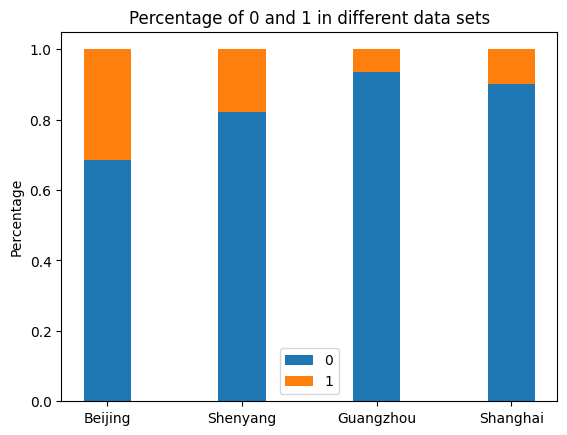

In [11]:
# Analyse data set #
# caluclate the percentage of 0 and 1 in training_labels
print("Beijing:\n\t",beijin_df['PM_HIGH'] .value_counts(normalize=True))
print("Shenyang:\n\t",Shenyang_df['PM_HIGH'] .value_counts(normalize=True))
print("Guangzhou:\n\t",Guangzhou_df['PM_HIGH'] .value_counts(normalize=True))
print("Shanghai:\n\t",Shanghai_df['PM_HIGH'] .value_counts(normalize=True))

# bar chart, the percentage of 0 and 1 in different data sets
import matplotlib.pyplot as plt
# Prepare the data
labels = ['Beijing', 'Shenyang', 'Guangzhou', 'Shanghai']
zeros = [beijin_df['PM_HIGH'].value_counts(normalize=True)[0], 
        Shenyang_df['PM_HIGH'].value_counts(normalize=True)[0], 
        Guangzhou_df['PM_HIGH'].value_counts(normalize=True)[0], 
        Shanghai_df['PM_HIGH'].value_counts(normalize=True)[0]]
ones = [beijin_df['PM_HIGH'].value_counts(normalize=True)[1],
        Shenyang_df['PM_HIGH'].value_counts(normalize=True)[1],
        Guangzhou_df['PM_HIGH'].value_counts(normalize=True)[1],
        Shanghai_df['PM_HIGH'].value_counts(normalize=True)[1]] 

x = range(len(labels))  
fig, ax = plt.subplots()
rects1 = ax.bar(x, zeros, width=0.35, label='0')
rects2 = ax.bar(x, ones, width=0.35, bottom=zeros, label='1')

ax.set_ylabel('Percentage')
ax.set_title('Percentage of 0 and 1 in different data sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class KMeansClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.cluster_labels = None

    def fit(self, X, y):
        # to train the model, 
        # we need to know the number of clusters, 
        # so we use KMeans to find the clusters
        self.kmeans = KMeans(n_clusters=self.n_clusters, n_init='auto', random_state=42)
        cluster_assignments = self.kmeans .fit_predict(X)
        # then we need to assign a label to each cluster
        self.cluster_labels = self._assign_cluster_labels(cluster_assignments, y)

    def predict(self, X):
        # to predict the labels,
        cluster_assignments = self.kmeans.predict(X)
        # we use the labels we assigned to the clusters
        predicted_labels = np.array([self.cluster_labels[cluster] for cluster in cluster_assignments])
        # and return the predicted labels
        return predicted_labels

    def score(self, X, y):
        # to evaluate the model,
        predicted_labels = self.predict(X)
        # we use accuracy
        return accuracy_score(y, predicted_labels)

    def _assign_cluster_labels(self, cluster_assignments, labels):
        # to assign a label to each cluster,
        unique_clusters = np.unique(cluster_assignments)
        cluster_labels = {}

        for cluster in unique_clusters:
            # we use the majority label of the examples in the cluster
            cluster_indices = np.where(cluster_assignments == cluster)[0]  # Use [0] to get a flat list
            majority_label = np.argmax(np.bincount(labels.iloc[cluster_indices]))
            cluster_labels[cluster] = majority_label
        return cluster_labels

Number of clusters,Training acc,Validating acc,evaluating acc(Guangzhou),evaluating acc(Shanghai)
2,0.728411,0.711572, 0.936391,0.901554
3,0.728411,0.711572, 0.936391,0.901554
4,0.728411,0.711572, 0.936391,0.901554
5,0.728411,0.711572, 0.936391,0.901554
6,0.728411,0.711572, 0.936391,0.901554
7,0.728411,0.711572, 0.936391,0.901554
8,0.728411,0.711572, 0.936391,0.901554
9,0.728411,0.711572, 0.936391,0.901554
10,0.728411,0.711572, 0.936391,0.901554
11,0.728411,0.711572, 0.936391,0.901554
12,0.728411,0.711572, 0.936391,0.901554
13,0.746114,0.734024, 0.889053,0.843819
14,0.746114,0.734024, 0.889053,0.845300
15,0.737910,0.728843, 0.854290,0.819393
16,0.737478,0.753022, 0.778846,0.729830
17,0.738774,0.751295, 0.781065,0.729090
18,0.746546,0.761658, 0.775888,0.716506
19,0.746114,0.761658, 0.777367,0.717987
20,0.746114,0.761658, 0.777367,0.717987
21,0.758204,0.765112, 0.818047,0.774981
22,0.757772,0.765112, 0.819527,0.778682
23,0.759931,0.765112, 0.789201,0.763138
24,0.764680,0.761658, 0.781065

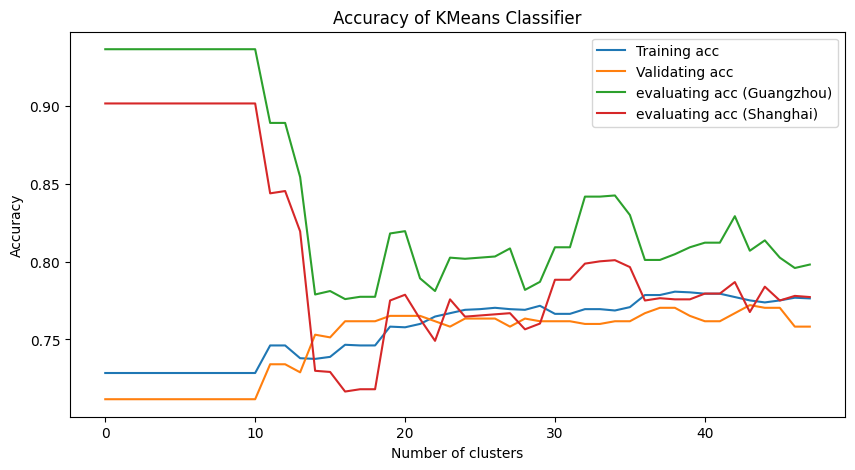

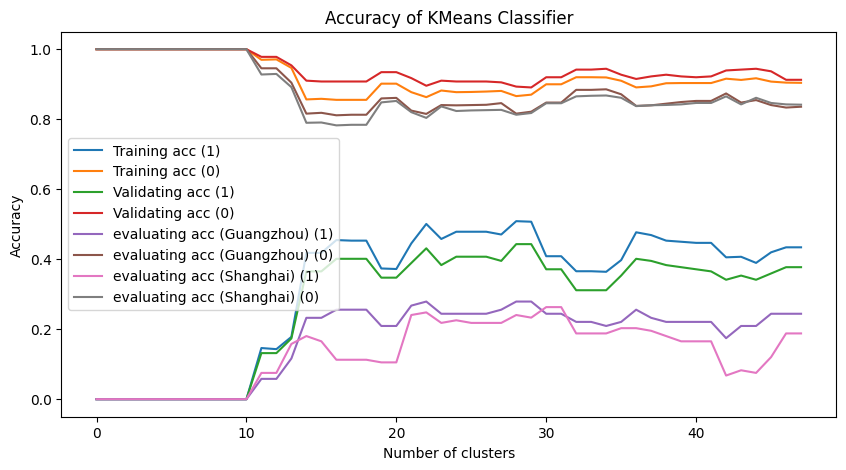

In [13]:
# plot different clusters to see the result

import matplotlib.pyplot as plt

training_acc_list = []
validating_acc_list = []
evaluating_acc_guangzhou_list = []
evaluating_acc_shanghai_list = []

training_acc_one_list = []
training_acc_zero_list = []

validating_acc_one_list = []
validating_acc_zero_list = []

evaluating_acc_guangzhou_one_list = []
evaluating_acc_guangzhou_zero_list = []

evaluating_acc_shanghai_one_list = []
evaluating_acc_shanghai_zero_list = []


print("Number of clusters,Training acc,Validating acc,evaluating acc(Guangzhou),evaluating acc(Shanghai)") 
for i in range(2,50):
  classifier = KMeansClassifier(i)
  classifier.fit(training_data, training_labels)

  # local func to calculate the acc of 0, 1 and the overall acc
  def acc_0_1(data, labels):
    acc_1 = classifier.score(data[labels == 1], labels[labels == 1])
    acc_0 = classifier.score(data[labels == 0], labels[labels == 0])
    acc = classifier.score(data, labels)
    return acc_0, acc_1, acc
  
  training_acc_0, training_acc_1, training_acc = acc_0_1(training_data, training_labels)
  validating_acc_0, validating_acc_1, validating_acc = acc_0_1(validating_data, validating_labels)
  evaluating_acc_guangzhou_0, evaluating_acc_guangzhou_1, evaluating_acc_guangzhou = acc_0_1(evaluating_data_1, evaluating_labels_1)
  evaluating_acc_shanghai_0, evaluating_acc_shanghai_1, evaluating_acc_shanghai = acc_0_1(evaluating_data_2, evaluating_labels_2)

  # save the acc to list
  training_acc_list.append(training_acc)
  validating_acc_list.append(validating_acc)
  evaluating_acc_guangzhou_list.append(evaluating_acc_guangzhou)
  evaluating_acc_shanghai_list.append(evaluating_acc_shanghai)
  
  training_acc_one_list.append(training_acc_1)
  training_acc_zero_list.append(training_acc_0)
  validating_acc_one_list.append(validating_acc_1)
  validating_acc_zero_list.append(validating_acc_0)
  evaluating_acc_guangzhou_one_list.append(evaluating_acc_guangzhou_1)
  evaluating_acc_guangzhou_zero_list.append(evaluating_acc_guangzhou_0)
  evaluating_acc_shanghai_one_list.append(evaluating_acc_shanghai_1)
  evaluating_acc_shanghai_zero_list.append(evaluating_acc_shanghai_0)
  
  # print all acc in a line
  print(f"{i},{training_acc:.6f},{validating_acc:.6f},",
        f"{evaluating_acc_guangzhou:.6f},{evaluating_acc_shanghai:.6f}")

# plot the overall acc
plt.figure(figsize=(10, 5))
plt.plot(training_acc_list, label='Training acc')
plt.plot(validating_acc_list, label='Validating acc')
plt.plot(evaluating_acc_guangzhou_list, label='evaluating acc (Guangzhou)')
plt.plot(evaluating_acc_shanghai_list, label='evaluating acc (Shanghai)')
plt.title('Accuracy of KMeans Classifier')
plt.xlabel('Number of clusters')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# plot the acc of 0 and 1
plt.figure(figsize=(10, 5))
plt.plot(training_acc_one_list, label='Training acc (1)')
plt.plot(training_acc_zero_list, label='Training acc (0)')
plt.plot(validating_acc_one_list, label='Validating acc (1)')
plt.plot(validating_acc_zero_list, label='Validating acc (0)')
plt.plot(evaluating_acc_guangzhou_one_list, label='evaluating acc (Guangzhou) (1)')
plt.plot(evaluating_acc_guangzhou_zero_list, label='evaluating acc (Guangzhou) (0)')
plt.plot(evaluating_acc_shanghai_one_list, label='evaluating acc (Shanghai) (1)')
plt.plot(evaluating_acc_shanghai_zero_list, label='evaluating acc (Shanghai) (0)')

plt.title('Accuracy of KMeans Classifier')
plt.xlabel('Number of clusters')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# try NN module to see if the accuracy can be improved
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

class VCliassfier():
  def __init__(self, pipeline):
    self.pipeline = pipeline

  def fit(self, X, y):
     # train the model
    self.pipeline.fit(X, y)

  def predict(self, X):
    # predict the labels
    return self.pipeline.predict(X)
  
  def score(self, X, y):
    # evaluate the model
    return self.pipeline.score(X, y)
  
def score(nn):
  # evaluate the model
  training_acc = nn.score(training_data, training_labels)
  print(f"Training accuracy: {training_acc:.6f}")

  validating_acc = nn.score(validating_data, validating_labels)
  print(f"Validating accuracy: {validating_acc:.6f}")

  evaluating_acc_guangzhou = nn.score(evaluating_data_1, evaluating_labels_1)
  print(f"evaluating accuracy(Guangzhou): {evaluating_acc_guangzhou:.6f}")

  evaluating_acc_shanghai = nn.score(evaluating_data_2, evaluating_labels_2)
  print(f"evaluating accuracy(Shanghai): {evaluating_acc_shanghai:.6f}")

In [21]:
# 5 layers
# create a pipeline
pipeline = make_pipeline(
  StandardScaler(), 
  MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), max_iter=1000, activation='relu', solver='adam', random_state=42))

myfn = VCliassfier(pipeline)

myfn.fit(training_data, training_labels)

score(myfn)

Training accuracy: 0.919689
Validating accuracy: 0.751295
evaluating accuracy(Guangzhou): 0.698964
evaluating accuracy(Shanghai): 0.678756


In [16]:
# SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# create a pipeline
pipeline = make_pipeline(
  StandardScaler(), 
  SVC(kernel='rbf', random_state=42))

mysvm = VCliassfier(pipeline)
mysvm.fit(training_data, training_labels)
score(mysvm)



Training accuracy: 0.805699
Validating accuracy: 0.787565
evaluating accuracy(Guangzhou): 0.812130
evaluating accuracy(Shanghai): 0.778682
